In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
df = pd.read_csv('F:/US_accidents.csv')
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


#EDA 

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [4]:
Integer = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
Integers = df.select_dtypes(include=Integer)
Integers.columns
len(Integers.columns)

14

In [5]:
missing = df.isna().sum().sort_values(ascending=False)/len(df)*100
missing

Number                   61.290031
Precipitation(in)        19.310789
Wind_Chill(F)            16.505678
Wind_Speed(mph)           5.550967
Wind_Direction            2.592834
Humidity(%)               2.568830
Weather_Condition         2.482514
Visibility(mi)            2.479350
Temperature(F)            2.434646
Pressure(in)              2.080593
Weather_Timestamp         1.783125
Airport_Code              0.335601
Timezone                  0.128596
Nautical_Twilight         0.100761
Civil_Twilight            0.100761
Sunrise_Sunset            0.100761
Astronomical_Twilight     0.100761
Zipcode                   0.046356
City                      0.004815
Street                    0.000070
Country                   0.000000
Junction                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Turning_Loop              0.000000
Traffic_Signal            0.000000
Traffic_Calming           0.000000
Stop                

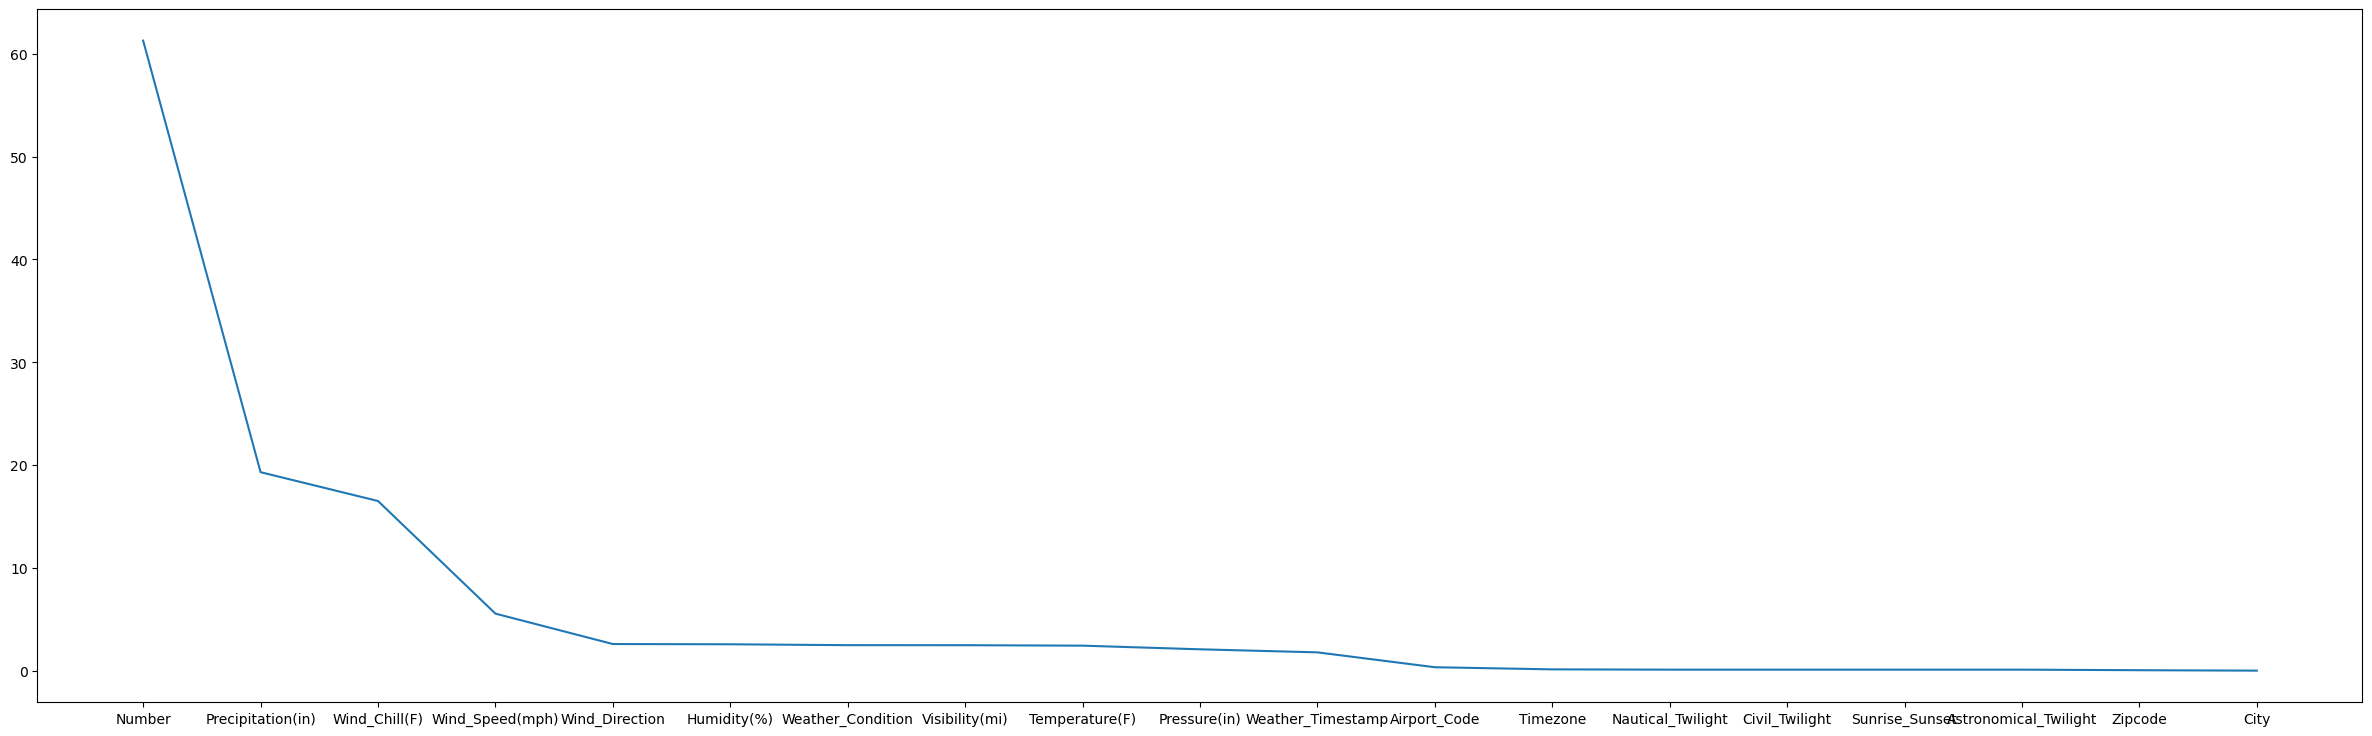

In [6]:
plt.figure(figsize=(30,9))
plt.plot(missing['Number':'City'])

<AxesSubplot:>

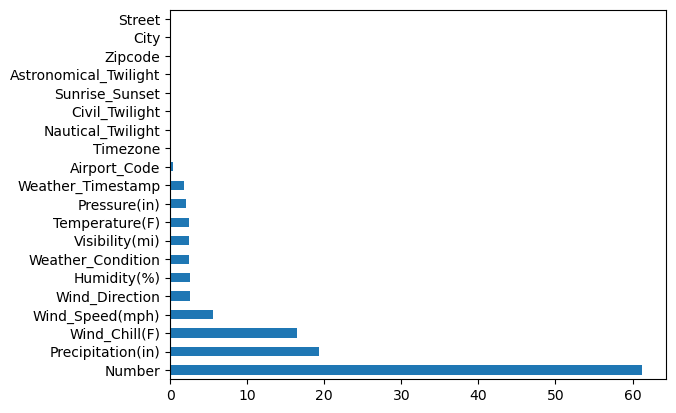

In [7]:
missing[missing !=0].plot(kind='barh')

In [8]:
cities_un = df['City'].unique()
cities_accidents = df['City'].value_counts()
cities_accidents

Miami                           106966
Los Angeles                      68956
Orlando                          54691
Dallas                           41979
Houston                          39448
                                 ...  
Ridgedale                            1
Sekiu                                1
Wooldridge                           1
Bullock                              1
American Fork-Pleasant Grove         1
Name: City, Length: 11681, dtype: int64

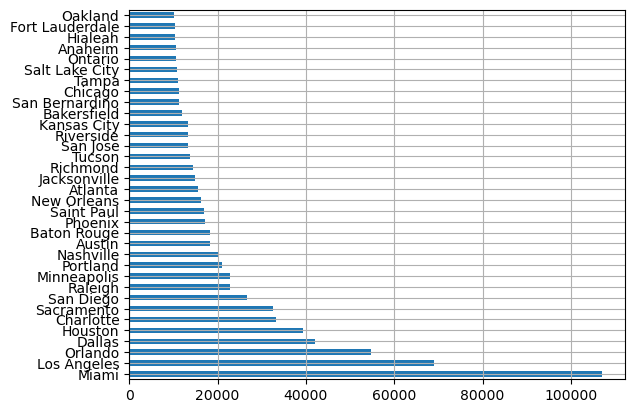

In [9]:
cities_accidents[cities_accidents>10000].plot(kind='barh')#cities with accidents above 10000
plt.grid()

In [10]:
high_accident_cities = cities_accidents[cities_accidents>10000]
len(high_accident_cities)

34

<AxesSubplot:ylabel='Frequency'>

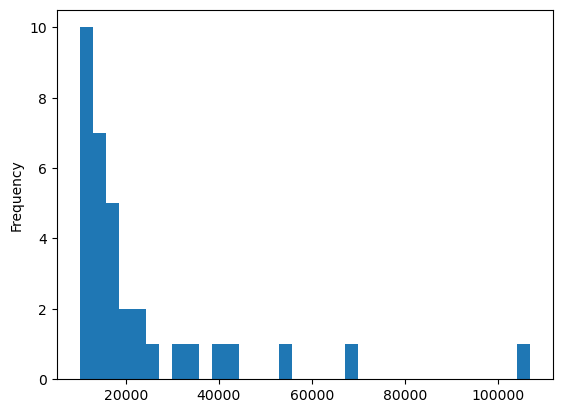

In [11]:
high_accident_cities.plot(kind='hist',bins = len(high_accident_cities))


In [12]:
low_accident_cities = cities_accidents[cities_accidents<100]
len(low_accident_cities)

8727

<AxesSubplot:>

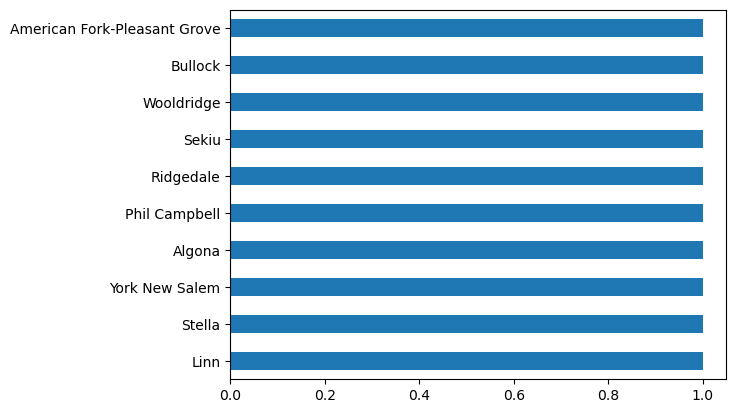

In [13]:
low_accident_cities[-10:].plot(kind='barh') #top 10 Cities with lowest accidents

In [14]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])


In [15]:
hour_of_accidents = df['Start_Time'].dt.hour.value_counts()

<AxesSubplot:>

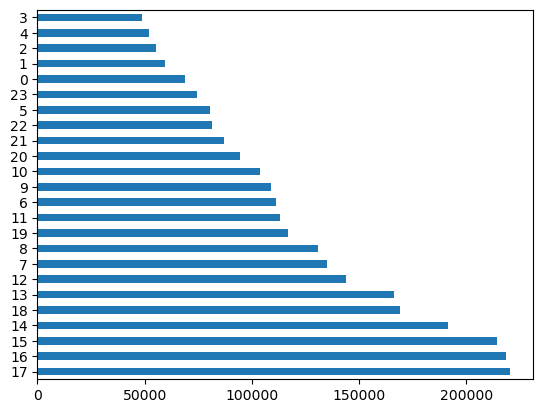

In [16]:
hour_of_accidents.plot(kind='barh')
#from the graph below we can say for sure that most accidents are taking place between 1 to 6 pm

<AxesSubplot:ylabel='Frequency'>

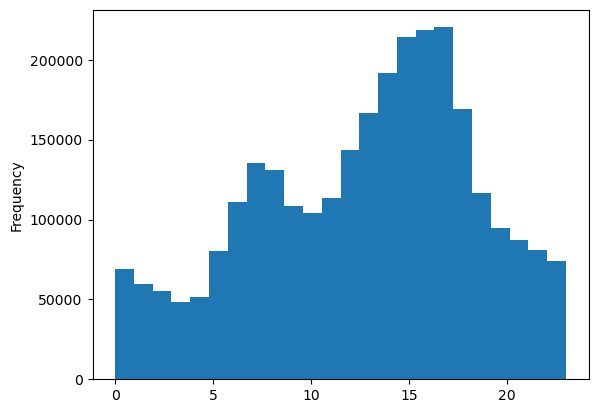

In [17]:
df['Start_Time'].dt.hour.plot(kind='hist',bins = 24)

In [18]:
day_of_week_accidents = df['Start_Time'].dt.day_of_week.value_counts()

<AxesSubplot:>

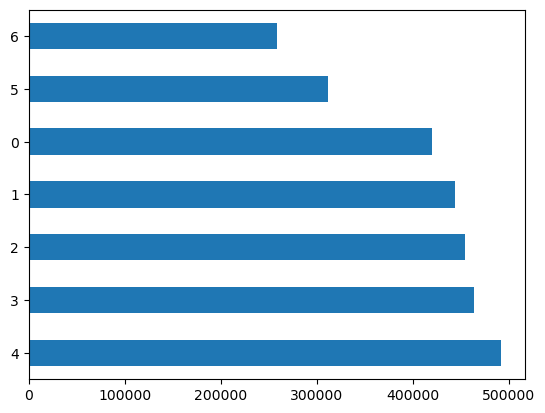

In [19]:
day_of_week_accidents.plot(kind='barh')
#0 is monday 1 is tuesday 2 is wednesday and so on
#from this we can say that most of the accidents are happening on the weekdays and less on the weekends

C:\Users\Tuff\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time', ylabel='Density'>

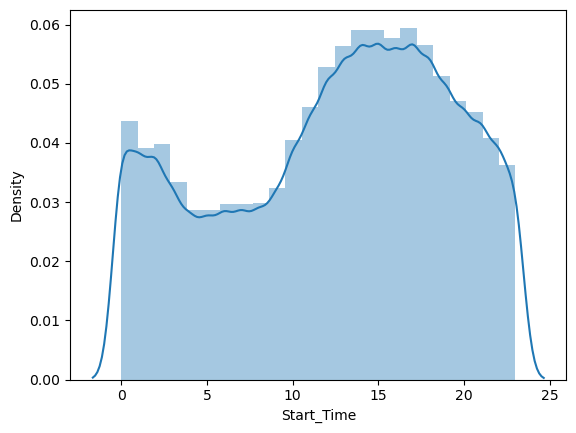

In [20]:
#now lets see at what time most of the accidents are happening on the day sunday which is 6
sunday = df['Start_Time'][df['Start_Time'].dt.dayofweek == 6]
sns.distplot(sunday.dt.hour, bins=24)

C:\Users\Tuff\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time', ylabel='Density'>

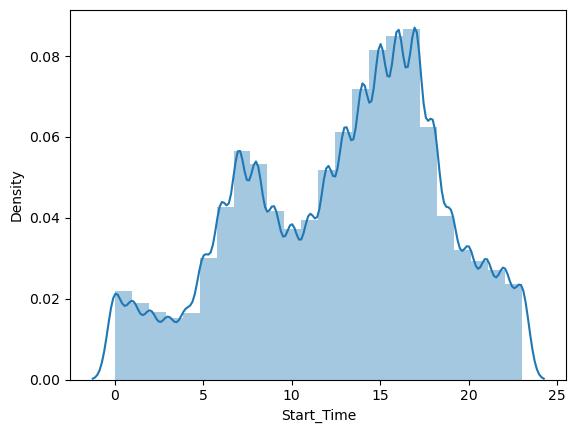

In [21]:
#now lets see at what time most of the accidents are happening on the day Thursday which is 3
Thursday = df['Start_Time'][df['Start_Time'].dt.dayofweek == 3]
sns.distplot(Thursday.dt.hour, bins=24)

In [22]:
month = df['Start_Time'].dt.month.value_counts()
month

12    473943
11    360696
10    299131
9     241822
6     226561
1     198365
2     194995
5     181944
8     178670
4     171880
7     159111
3     158224
Name: Start_Time, dtype: int64

<AxesSubplot:>

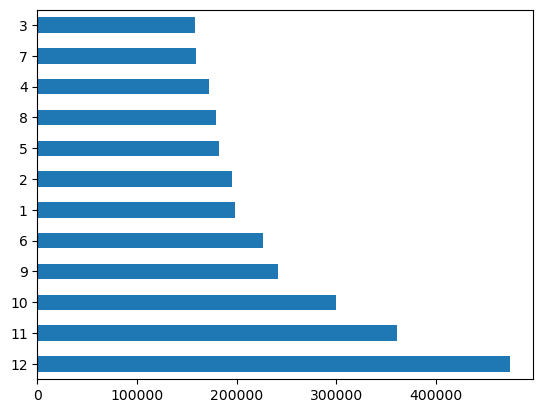

In [23]:
#from this we know most of the accidents happen in the month december
month.plot(kind='barh')

In [24]:
year = df['Start_Time'].dt.year.sort_values(ascending=True).value_counts()
year.pct_change(1)
#it is saying that from the 2020 percentage threshold we can see that 2019 percentage is 6677773 % less than 2020 cases

2021         NaN
2020   -0.585999
2019   -0.586787
2017   -0.366170
2018   -0.004527
2016   -0.252194
Name: Start_Time, dtype: float64

<AxesSubplot:>

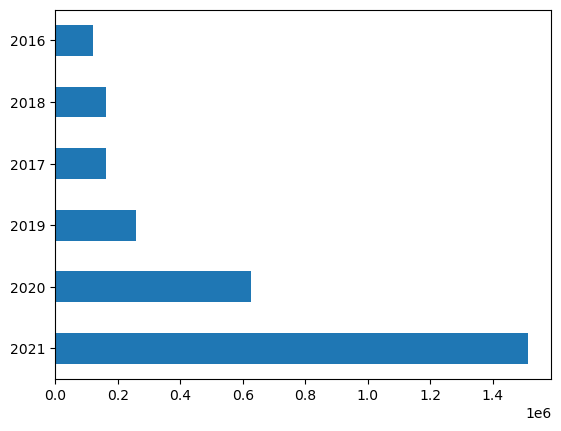

In [25]:
year.plot(kind='barh')
# as the year's are progressing the increase in the accidents are also increasing significantly

In [26]:
sev = df['Severity'].value_counts()

<AxesSubplot:>

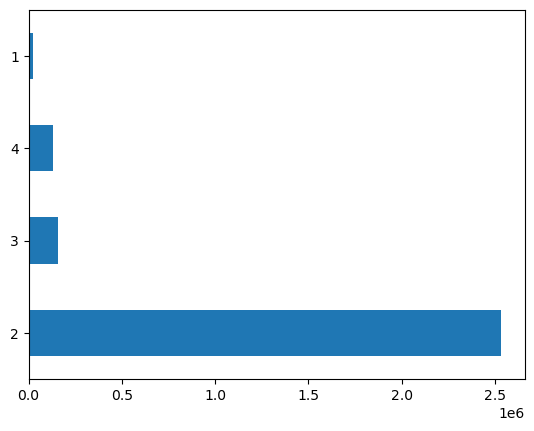

In [27]:
sev.plot(kind='barh')
# we can now see that most of the cases we are getting are of level 2 Severity

In [28]:

state = df['State'].value_counts()

<AxesSubplot:>

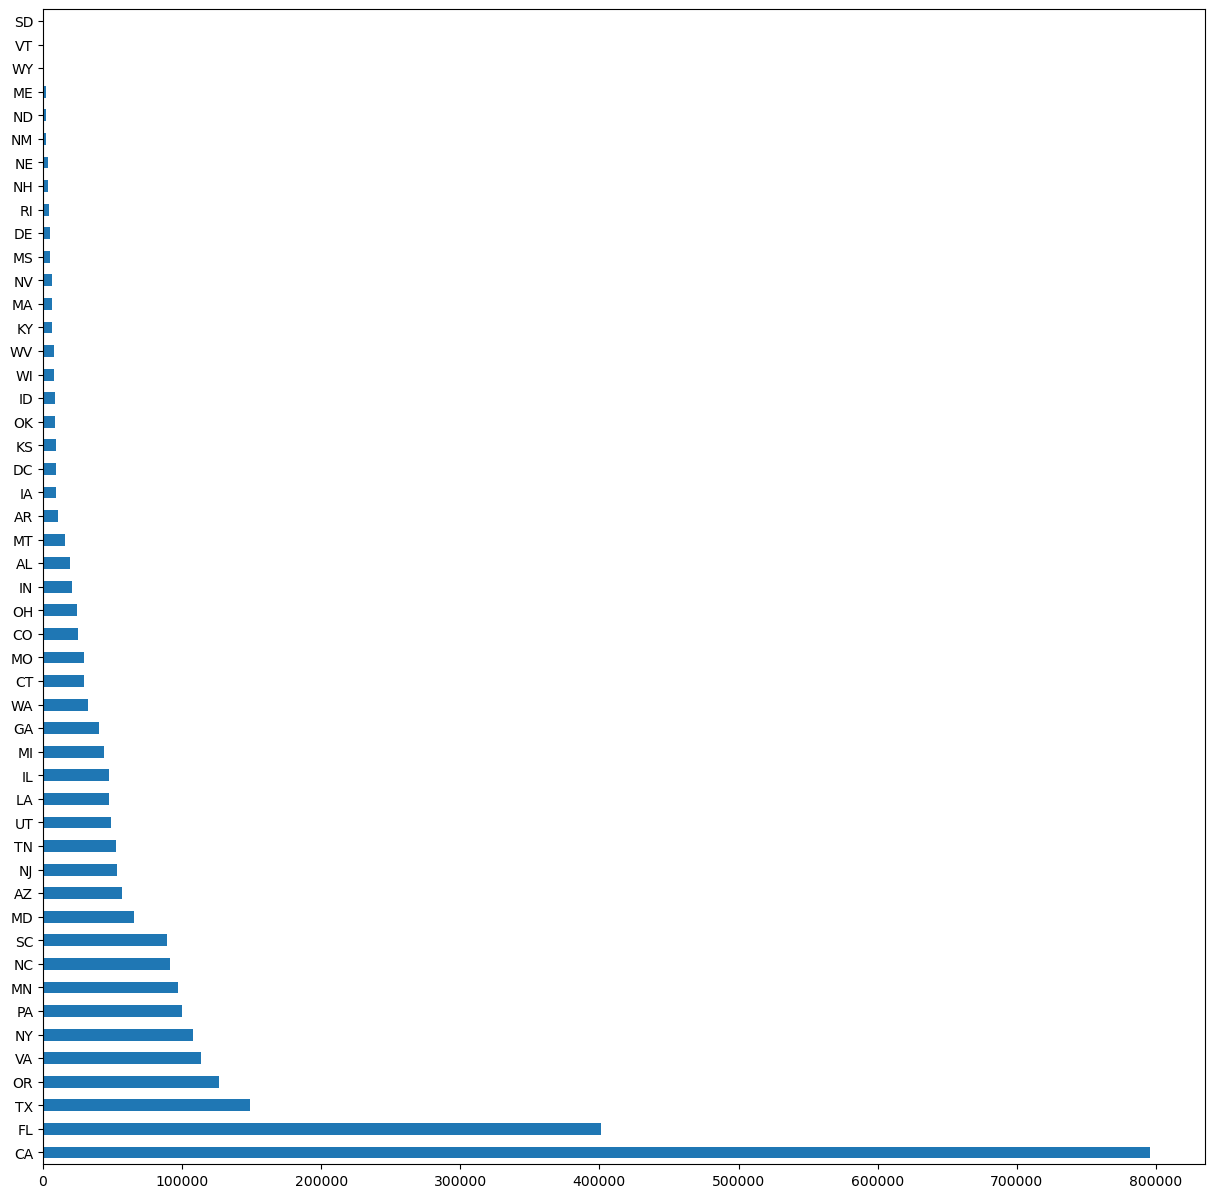

In [29]:
plt.figure(figsize=(15,15))
state.plot(kind='barh')
# California has become the Epicenter of the accidents

In [30]:
df['Start_Lng']

0          -83.092860
1          -84.062800
2          -84.524680
3          -81.537840
4          -84.492792
              ...    
2845337   -117.379360
2845338   -117.148060
2845339   -117.847790
2845340   -118.403020
2845341   -117.230920
Name: Start_Lng, Length: 2845342, dtype: float64

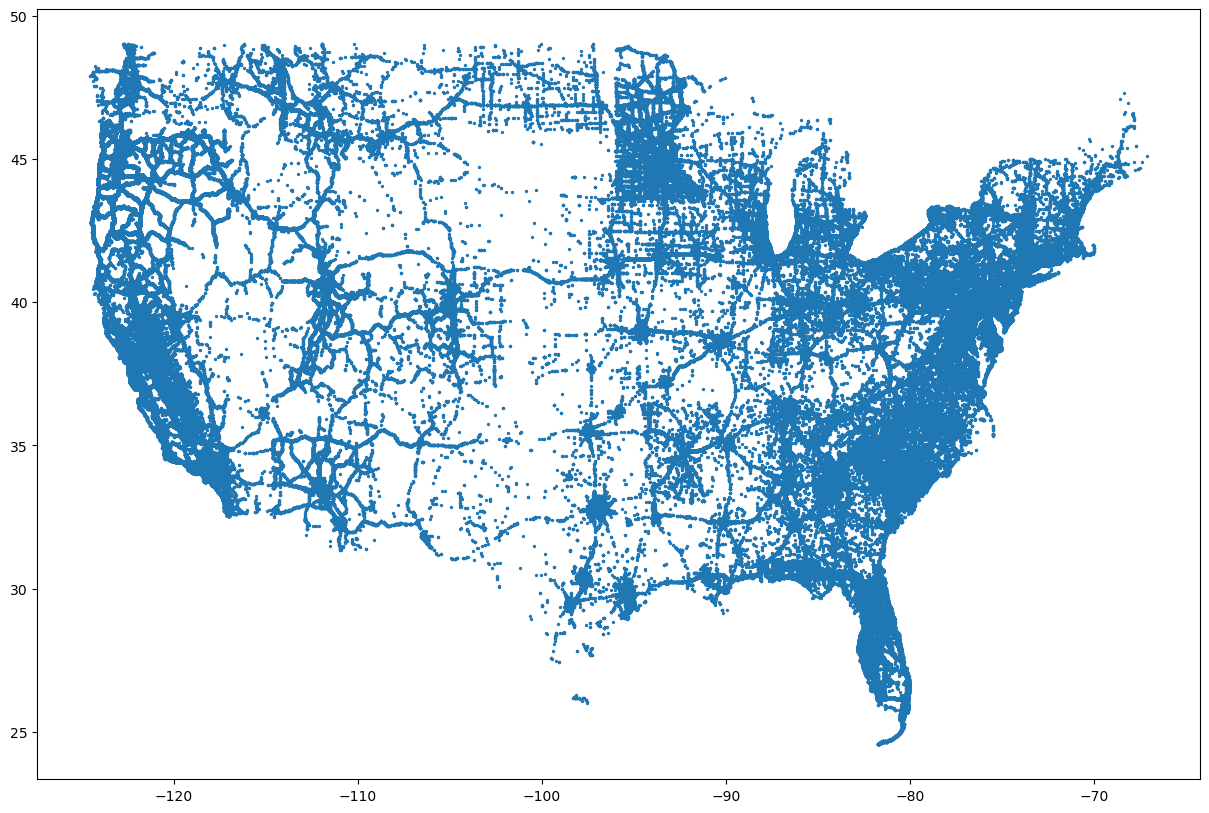

In [31]:
plt.figure(figsize=(15,10))
plt.scatter(df['Start_Lng'],df['Start_Lat'],s=2)

In [32]:
import plotly.graph_objects as go
df['City']

0               Dublin
1               Dayton
2           Cincinnati
3                Akron
4           Cincinnati
              ...     
2845337      Riverside
2845338      San Diego
2845339         Orange
2845340    Culver City
2845341       Highland
Name: City, Length: 2845342, dtype: object

In [33]:
fig = go.Figure(data=go.Scattergeo(
        lon = df['Start_Lng'],
        lat = df['Start_Lat'],
        text = df['City'],
        mode = 'markers',
        ))
#fig.update_layout(
        #title = 'Most Accidents <br>(Hover for City names)',
        #geo_scope='usa',
    #)
#fig.show()

Preprocessing

In [34]:
df["Year"] = df["Start_Time"].dt.year
df["Month"] = df["Start_Time"].dt.month
df["Weekday"] = df["Start_Time"].dt.weekday
df["Day"] = df["Start_Time"].dt.day
df["Hour"] = df["Start_Time"].dt.hour
df["Minute"] = df["Start_Time"].dt.minute
#adding the  time features

In [35]:
df.head(100)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Month,Weekday,Day,Hour,Minute
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,Night,Night,Night,Night,2016,2,0,8,0,37
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,Night,Night,Night,Night,2016,2,0,8,5,56
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,Night,Night,Night,Day,2016,2,0,8,6,15
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,Night,Night,Day,Day,2016,2,0,8,6,51
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,Day,Day,Day,Day,2016,2,0,8,7,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,A-96,2,2016-02-11 07:47:57,2016-02-11 13:47:57,41.377170,-81.513900,41.368280,-81.516470,0.629,At Broadway Ave/Forbes Rd/Exit 23 - Accident.,...,Day,Day,Day,Day,2016,2,3,11,7,47
96,A-97,2,2016-02-11 07:58:15,2016-02-11 13:58:15,39.173970,-84.490310,39.176500,-84.487570,0.228,At OH-562/Exit 7 - Accident.,...,Day,Day,Day,Day,2016,2,3,11,7,58
97,A-98,2,2016-02-11 08:28:42,2016-02-11 14:28:42,39.755130,-84.166140,39.754240,-84.155980,0.543,At Steve Whalen Blvd - Accident.,...,Day,Day,Day,Day,2016,2,3,11,8,28
98,A-99,2,2016-02-11 08:40:21,2016-02-11 14:40:21,39.173970,-84.490310,39.176500,-84.487570,0.228,At OH-562/Exit 7 - Accident.,...,Day,Day,Day,Day,2016,2,3,11,8,40


In [36]:
corr = df.corr()

<AxesSubplot:>

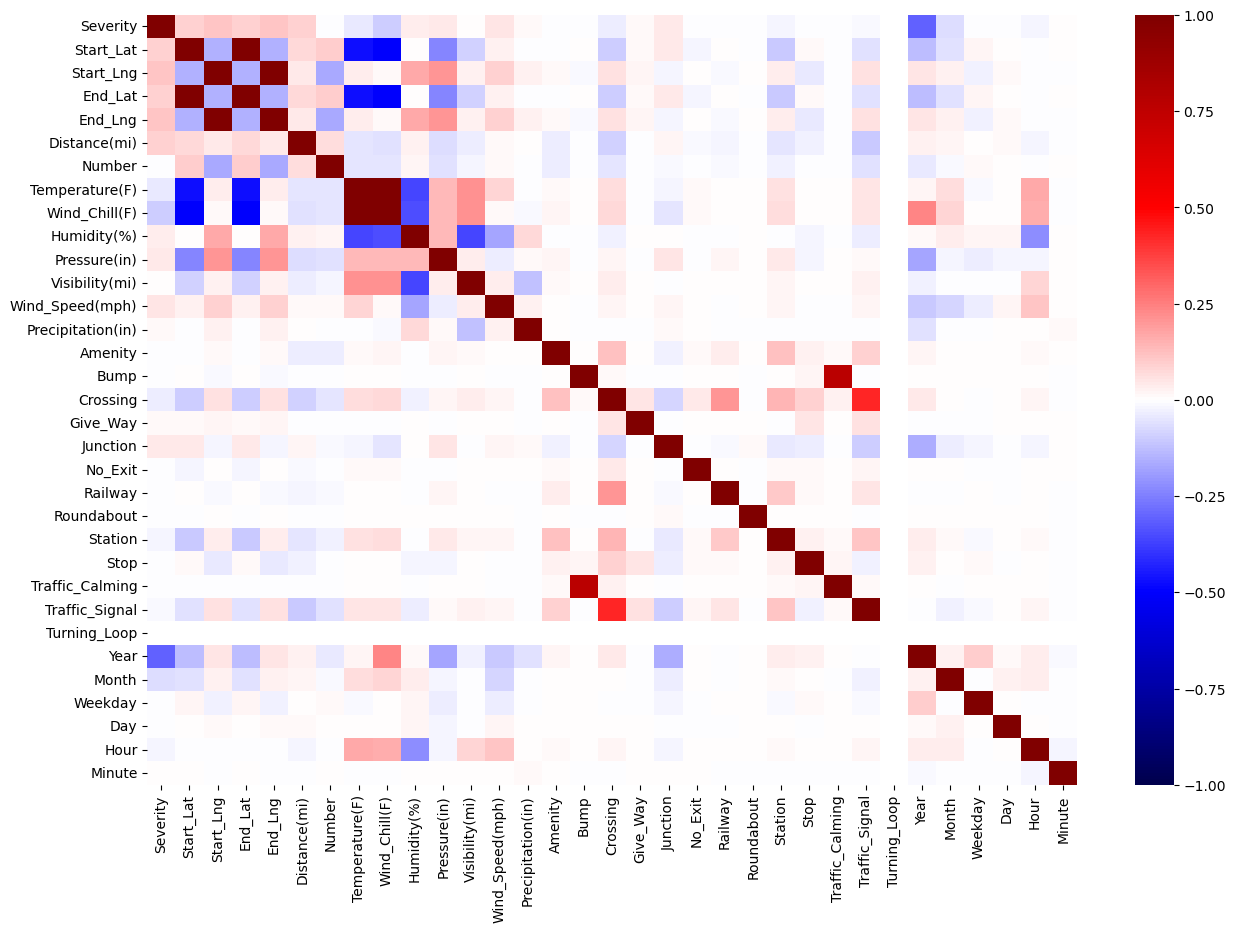

In [37]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr, vmin=-1, vmax=1, cmap="seismic")

In [38]:
drop = ["ID", "Start_Time", "End_Time", "End_Lat", "End_Lng", "Description", "Number", "Street", "County", "State", "Zipcode", "Country", "Timezone", "Airport_Code", "Weather_Timestamp", "Wind_Chill(F)", "Turning_Loop", "Sunrise_Sunset", "Nautical_Twilight", "Astronomical_Twilight"]
df = df.drop(drop, axis=1)
df.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Side,City,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),...,Stop,Traffic_Calming,Traffic_Signal,Civil_Twilight,Year,Month,Weekday,Day,Hour,Minute
0,3,40.108910,-83.092860,3.230,R,Dublin,42.1,58.0,29.76,10.0,...,False,False,False,Night,2016,2,0,8,0,37
1,2,39.865420,-84.062800,0.747,R,Dayton,36.9,91.0,29.68,10.0,...,False,False,False,Night,2016,2,0,8,5,56
2,2,39.102660,-84.524680,0.055,R,Cincinnati,36.0,97.0,29.70,10.0,...,False,False,False,Night,2016,2,0,8,6,15
3,2,41.062130,-81.537840,0.123,R,Akron,39.0,55.0,29.65,10.0,...,False,False,False,Night,2016,2,0,8,6,51
4,3,39.172393,-84.492792,0.500,R,Cincinnati,37.0,93.0,29.69,10.0,...,False,False,False,Day,2016,2,0,8,7,53


In [39]:
df.drop_duplicates(inplace=True)
len(df)

2646365

In [40]:
df['Side'].unique()

array(['R', 'L', 'N'], dtype=object)

In [41]:
df = df[df['Pressure(in)'] != 0]
df = df[df['Humidity(%)'] !=0]
df = df[df['Visibility(mi)'] !=0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2643412 entries, 0 to 2845341
Data columns (total 33 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Severity           int64  
 1   Start_Lat          float64
 2   Start_Lng          float64
 3   Distance(mi)       float64
 4   Side               object 
 5   City               object 
 6   Temperature(F)     float64
 7   Humidity(%)        float64
 8   Pressure(in)       float64
 9   Visibility(mi)     float64
 10  Wind_Direction     object 
 11  Wind_Speed(mph)    float64
 12  Precipitation(in)  float64
 13  Weather_Condition  object 
 14  Amenity            bool   
 15  Bump               bool   
 16  Crossing           bool   
 17  Give_Way           bool   
 18  Junction           bool   
 19  No_Exit            bool   
 20  Railway            bool   
 21  Roundabout         bool   
 22  Station            bool   
 23  Stop               bool   
 24  Traffic_Calming    bool   
 25  Traffic_Signal    

In [42]:
df["Weather_Condition"].unique()

array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Snow', 'Light Snow',
       'Cloudy', nan, 'Scattered Clouds', 'Clear', 'Partly Cloudy',
       'Light Freezing Drizzle', 'Light Drizzle', 'Haze', 'Rain',
       'Heavy Rain', 'Fair', 'Drizzle', 'Fog', 'Thunderstorms and Rain',
       'Patches of Fog', 'Light Thunderstorms and Rain', 'Mist',
       'Rain Showers', 'Light Rain Showers', 'Heavy Drizzle', 'Smoke',
       'Light Freezing Fog', 'Light Freezing Rain', 'Blowing Snow',
       'Heavy Thunderstorms and Rain', 'Heavy Snow', 'Snow Grains',
       'Squalls', 'Light Fog', 'Shallow Fog', 'Thunderstorm',
       'Light Ice Pellets', 'Thunder', 'Thunder in the Vicinity',
       'Fair / Windy', 'Light Rain with Thunder',
       'Heavy Thunderstorms and Snow', 'Light Snow Showers',
       'Cloudy / Windy', 'Ice Pellets', 'N/A Precipitation',
       'Light Thunderstorms and Snow', 'T-Storm', 'Rain / Windy',
       'Wintry Mix', 'Partly Cloudy / Windy', 'Heavy T-Storm', 'Sand',
       'Ligh

In [43]:
df.isna().sum()

Severity                  0
Start_Lat                 0
Start_Lng                 0
Distance(mi)              0
Side                      0
City                    134
Temperature(F)        64920
Humidity(%)           68452
Pressure(in)          55549
Visibility(mi)        66231
Wind_Direction        68730
Wind_Speed(mph)      152344
Precipitation(in)    538377
Weather_Condition     66355
Amenity                   0
Bump                      0
Crossing                  0
Give_Way                  0
Junction                  0
No_Exit                   0
Railway                   0
Roundabout                0
Station                   0
Stop                      0
Traffic_Calming           0
Traffic_Signal            0
Civil_Twilight         2652
Year                      0
Month                     0
Weekday                   0
Day                       0
Hour                      0
Minute                    0
dtype: int64

In [44]:
fill = ["Temperature(F)", "Humidity(%)", "Pressure(in)", "Visibility(mi)", "Wind_Speed(mph)", "Precipitation(in)"]
df[fill] = df[fill].fillna(df[fill].median())

df.dropna(inplace=True)

df.isna().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2558866 entries, 0 to 2845341
Data columns (total 33 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Severity           int64  
 1   Start_Lat          float64
 2   Start_Lng          float64
 3   Distance(mi)       float64
 4   Side               object 
 5   City               object 
 6   Temperature(F)     float64
 7   Humidity(%)        float64
 8   Pressure(in)       float64
 9   Visibility(mi)     float64
 10  Wind_Direction     object 
 11  Wind_Speed(mph)    float64
 12  Precipitation(in)  float64
 13  Weather_Condition  object 
 14  Amenity            bool   
 15  Bump               bool   
 16  Crossing           bool   
 17  Give_Way           bool   
 18  Junction           bool   
 19  No_Exit            bool   
 20  Railway            bool   
 21  Roundabout         bool   
 22  Station            bool   
 23  Stop               bool   
 24  Traffic_Calming    bool   
 25  Traffic_Signal    

In [45]:
from sklearn.preprocessing import MinMaxScaler
Integer = ['int16', 'int32','int64', 'float16', 'float32', 'float64']
Integers = df.select_dtypes(include=Integer)
Integers = set(Integers)
Integers = Integers - set(['Severity'])

In [46]:
scaler = MinMaxScaler()
features = ['Temperature(F)','Distance(mi)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)','Start_Lng','Start_Lat','Year', 'Month','Weekday','Day','Hour','Minute']
df[features] = scaler.fit_transform(df[features])
df.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Side,City,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),...,Stop,Traffic_Calming,Traffic_Signal,Civil_Twilight,Year,Month,Weekday,Day,Hour,Minute
0,3,0.636103,0.721777,0.020814,R,Dublin,0.460000,0.575758,0.505095,0.07103,...,False,False,False,Night,0.0,0.090909,0.0,0.233333,0.000000,0.627119
1,2,0.626138,0.704890,0.004814,R,Dayton,0.441754,0.909091,0.503736,0.07103,...,False,False,False,Night,0.0,0.090909,0.0,0.233333,0.217391,0.949153
2,2,0.594921,0.696848,0.000354,R,Cincinnati,0.438596,0.969697,0.504076,0.07103,...,False,False,False,Night,0.0,0.090909,0.0,0.233333,0.260870,0.254237
3,2,0.675114,0.748852,0.000793,R,Akron,0.449123,0.545455,0.503227,0.07103,...,False,False,False,Night,0.0,0.090909,0.0,0.233333,0.260870,0.864407
4,3,0.597775,0.697403,0.003222,R,Cincinnati,0.442105,0.929293,0.503906,0.07103,...,False,False,False,Day,0.0,0.090909,0.0,0.233333,0.304348,0.898305


In [47]:
a = ['object']
a_ob = df.select_dtypes(a)
a_ob

,Side,City,Wind_Direction,Weather_Condition,Civil_Twilight
0,R,Dublin,SW,Light Rain,Night
1,R,Dayton,Calm,Light Rain,Night
2,R,Cincinnati,Calm,Overcast,Night
3,R,Akron,Calm,Overcast,Night
4,R,Cincinnati,WSW,Light Rain,Day
...,...,...,...,...,...
2845337,R,Riverside,W,Fair,Day
2845338,R,San Diego,SW,Fair,Day
2845339,R,Orange,SSW,Partly Cloudy,Day
2845340,R,Culver City,SW,Fair,Day


In [48]:
import category_encoders as ce

In [49]:
be = ce.binary.BinaryEncoder()

city_enc = be.fit_transform(df["City"])
city_enc
#showing error because changes of this cell is already been made

,City_0,City_1,City_2,City_3,City_4,City_5,City_6,City_7,City_8,City_9,City_10,City_11,City_12,City_13
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,0,0,0,0,1,0,0,0,0,1,1,1,0,1
2845338,0,0,0,0,1,0,0,0,0,1,1,0,0,0
2845339,0,0,0,0,1,0,0,0,1,1,1,1,0,0
2845340,0,0,0,0,1,0,0,0,1,0,0,0,1,1


In [50]:
df = pd.concat([df,city_enc],axis=1).drop('City',axis = 1)
df
#showing error because changes of this cell is already been made

,Severity,Start_Lat,Start_Lng,Distance(mi),Side,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,...,City_4,City_5,City_6,City_7,City_8,City_9,City_10,City_11,City_12,City_13
0,3,0.636103,0.721777,0.020814,R,0.460000,0.575758,0.505095,0.071030,SW,...,0,0,0,0,0,0,0,0,0,1
1,2,0.626138,0.704890,0.004814,R,0.441754,0.909091,0.503736,0.071030,Calm,...,0,0,0,0,0,0,0,0,1,0
2,2,0.594921,0.696848,0.000354,R,0.438596,0.969697,0.504076,0.071030,Calm,...,0,0,0,0,0,0,0,0,1,1
3,2,0.675114,0.748852,0.000793,R,0.449123,0.545455,0.503227,0.071030,Calm,...,0,0,0,0,0,0,0,1,0,0
4,3,0.597775,0.697403,0.003222,R,0.442105,0.929293,0.503906,0.071030,WSW,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,2,0.386193,0.124815,0.003499,R,0.614035,0.393939,0.490829,0.071030,W,...,1,0,0,0,0,1,1,1,0,1
2845338,2,0.335629,0.128842,0.002178,R,0.557895,0.727273,0.498811,0.071030,SW,...,1,0,0,0,0,1,1,0,0,0
2845339,2,0.376902,0.116659,0.003615,R,0.568421,0.636364,0.504755,0.071030,SSW,...,1,0,0,0,1,1,1,1,0,0
2845340,2,0.385783,0.106992,0.004975,R,0.561404,0.808081,0.502717,0.071030,SW,...,1,0,0,0,1,0,0,0,1,1


In [51]:
df.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Side,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,...,City_4,City_5,City_6,City_7,City_8,City_9,City_10,City_11,City_12,City_13
0,3,0.636103,0.721777,0.020814,R,0.460000,0.575758,0.505095,0.07103,SW,...,0,0,0,0,0,0,0,0,0,1
1,2,0.626138,0.704890,0.004814,R,0.441754,0.909091,0.503736,0.07103,Calm,...,0,0,0,0,0,0,0,0,1,0
2,2,0.594921,0.696848,0.000354,R,0.438596,0.969697,0.504076,0.07103,Calm,...,0,0,0,0,0,0,0,0,1,1
3,2,0.675114,0.748852,0.000793,R,0.449123,0.545455,0.503227,0.07103,Calm,...,0,0,0,0,0,0,0,1,0,0
4,3,0.597775,0.697403,0.003222,R,0.442105,0.929293,0.503906,0.07103,WSW,...,0,0,0,0,0,0,0,0,1,1


In [52]:
df = df.replace([True, False], [1, 0])

df.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Side,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,...,City_4,City_5,City_6,City_7,City_8,City_9,City_10,City_11,City_12,City_13
0,3,0.636103,0.721777,0.020814,R,0.460000,0.575758,0.505095,0.07103,SW,...,0,0,0,0,0,0,0,0,0,1
1,2,0.626138,0.704890,0.004814,R,0.441754,0.909091,0.503736,0.07103,Calm,...,0,0,0,0,0,0,0,0,1,0
2,2,0.594921,0.696848,0.000354,R,0.438596,0.969697,0.504076,0.07103,Calm,...,0,0,0,0,0,0,0,0,1,1
3,2,0.675114,0.748852,0.000793,R,0.449123,0.545455,0.503227,0.07103,Calm,...,0,0,0,0,0,0,0,1,0,0
4,3,0.597775,0.697403,0.003222,R,0.442105,0.929293,0.503906,0.07103,WSW,...,0,0,0,0,0,0,0,0,1,1


In [53]:
cat = set(["Side", "City", "Wind_Direction", "Weather_Condition", "Civil_Twilight"])
onehot_cols = cat - set(["City"])

df = pd.get_dummies(df, columns=onehot_cols, drop_first=True)

df.head()

C:\Users\Tuff\AppData\Local\Temp\ipykernel_3676\2177430071.py:4: FutureWarning:

Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.



,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),...,Weather_Condition_Thunder in the Vicinity,Weather_Condition_Thunderstorm,Weather_Condition_Thunderstorms and Rain,Weather_Condition_Tornado,Weather_Condition_Volcanic Ash,Weather_Condition_Widespread Dust,Weather_Condition_Widespread Dust / Windy,Weather_Condition_Wintry Mix,Weather_Condition_Wintry Mix / Windy,Civil_Twilight_Night
0,3,0.636103,0.721777,0.020814,0.460000,0.575758,0.505095,0.07103,0.009568,0.000000,...,0,0,0,0,0,0,0,0,0,1
1,2,0.626138,0.704890,0.004814,0.441754,0.909091,0.503736,0.07103,0.006440,0.000833,...,0,0,0,0,0,0,0,0,0,1
2,2,0.594921,0.696848,0.000354,0.438596,0.969697,0.504076,0.07103,0.006440,0.000833,...,0,0,0,0,0,0,0,0,0,1
3,2,0.675114,0.748852,0.000793,0.449123,0.545455,0.503227,0.07103,0.006440,0.000000,...,0,0,0,0,0,0,0,0,0,1
4,3,0.597775,0.697403,0.003222,0.442105,0.929293,0.503906,0.07103,0.009568,0.000417,...,0,0,0,0,0,0,0,0,0,0
